<a href="https://colab.research.google.com/github/swapnilprakashpatil/aai501_6proj/blob/Maurin/India_prophet_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import All Necessary Libraries
import numpy as np
import pandas as pd
from prophet import Prophet
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import cvxpy as cp
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Load Dataset
from pathlib import Path
import pandas as pd

# Define the file path
file_path = Path("..") / "data" / "Cleaned_merged_SIPRI_Region_ACLED_starting2000.csv" # Suitable for within Github repository
#file_path = '/content/Cleaned_merged_SIPRI_Region_ACLED_starting2000.csv'                         # for when working in same directory

# Load the CSV file
df = pd.read_csv(file_path)

print(df.columns)
#df.head()

Index(['Country', 'Year', 'Expenditure-Share_of_Govt_spending',
       'Expenditure-Share_of_GDP', 'Expenditure_Per_Capita',
       'Expenditure_Constant_2022', 'Region', 'Subregion', 'index_level',
       'total_rank_from_avg_rank', 'avg_rank', 'Deadliness_rank',
       'Diffusion_rank', 'Danger_rank', 'Fragmentation_rank',
       'Deadliness_scaled_rank', 'Diffusion_scaled_rank', 'Danger_scaled_rank',
       'Fragmentation_scaled_rank', 'total_score_rank', 'Deadliness_raw',
       'Diffusion_raw', 'Danger_raw', 'Fragmentation_raw', 'Deadliness_scaled',
       'Diffusion_scaled', 'Danger_scaled', 'Fragmentation_scaled',
       'total_score'],
      dtype='object')


In [ ]:
# Using DataFrame.copy() create new dataframe to focus on spending over time by country
df2 = df[['Country', 'Year', 'Expenditure_Constant_2022']].copy() # Select three specific columns
df2.head()

,Country,Year,Expenditure_Constant_2022
0,Brazil,2000,15643.43168
1,Brazil,2001,18119.43481
2,Brazil,2002,18361.33076
3,Brazil,2003,14647.82954
4,Brazil,2004,15219.74744


In [ ]:
# select the top 5 countries that we are interested in
# Filter rows for each country and run model
#This notebook is for India
India_df = df2[df2['Country'] == 'India']

print(India_df)

    Country  Year  Expenditure_Constant_2022
334   India  2000                30892.77738
335   India  2001                31968.73352
336   India  2002                31869.78246
337   India  2003                32581.35384
338   India  2004                37846.22031
339   India  2005                40276.83130
340   India  2006                40603.17172
341   India  2007                41093.66178
342   India  2008                46610.48938
343   India  2009                54876.60948
344   India  2010                55097.28307
345   India  2011                55603.63358
346   India  2012                55321.45496
347   India  2013                55358.07281
348   India  2014                58055.35989
349   India  2015                58606.92885
350   India  2016                64584.08171
351   India  2017                69133.65013
352   India  2018                71568.22018
353   India  2019                76620.72741
354   India  2020                77085.46974
355   Indi

In [ ]:
# Import to_datetime from pandas
from pandas import to_datetime

#set up country dataframe to be used by prophet
India_df2= India_df[['Year', 'Expenditure_Constant_2022']]


# Rename the columns to 'ds' and 'y' for use by Prophet and convert time date time stamp expected by Prophet
India_df2 = India_df2.rename(columns={'Year': 'ds', 'Expenditure_Constant_2022': 'y'})
India_df2['ds'] = to_datetime(India_df2['ds'], format='%Y')

# Fit the model by instantiating a new Prophet object and disable irrelevant seasonality
model = Prophet(yearly_seasonality = True, weekly_seasonality=False, daily_seasonality=False)

# Call the fit method and pass in the historical dataframe. Fitting should take 1-5 seconds
model.fit(India_df2)

INFO:prophet:n_changepoints greater than number of observations. Using 18.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpswz4k28l/lh41jjvz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpswz4k28l/cfw37twq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24253', 'data', 'file=/tmp/tmpswz4k28l/lh41jjvz.json', 'init=/tmp/tmpswz4k28l/cfw37twq.json', 'output', 'file=/tmp/tmpswz4k28l/prophet_model7zi1zptd/prophet_model-20241206011018.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
01:10:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:10:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
#Simulate the trend of expenditures for this country to 2030
future = model.make_future_dataframe(periods=8, freq = "YE", include_history= True)

#Make predictions on the future dataframe
forecast = model.predict(future) #This line is added to predict values and store them in forecast dataframe

#View predictions
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])


           ds           yhat     yhat_lower     yhat_upper
0  2000-01-01   28152.420705   25070.437660   31297.285513
1  2001-01-01   30946.382818   27942.000531   33890.986394
2  2002-01-01   32424.271887   29206.361299   35439.487210
3  2003-01-01   34651.184443   31589.737423   37686.199685
4  2004-01-01   37627.397275   34633.067189   40834.199294
5  2005-01-01   40421.359389   37289.915816   43438.737858
6  2006-01-01   41899.248466   38843.995006   44801.817568
7  2007-01-01   44126.164159   41080.975721   47003.624509
8  2008-01-01   47102.380129   43994.344894   50403.670604
9  2009-01-01   49896.345389   46810.154755   52946.047267
10 2010-01-01   51374.237596   48395.878784   54703.365318
11 2011-01-01   53601.153296   50632.696501   56846.820643
12 2012-01-01   56577.533202   53580.193915   59678.186283
13 2013-01-01   59371.676054   56356.218445   62502.614598
14 2014-01-01   60849.968963   57526.828330   63645.925382
15 2015-01-01   63078.179082   60247.992155   66242.3605

Text(0.5, 1.0, 'India Military Spending Past and Predicted')

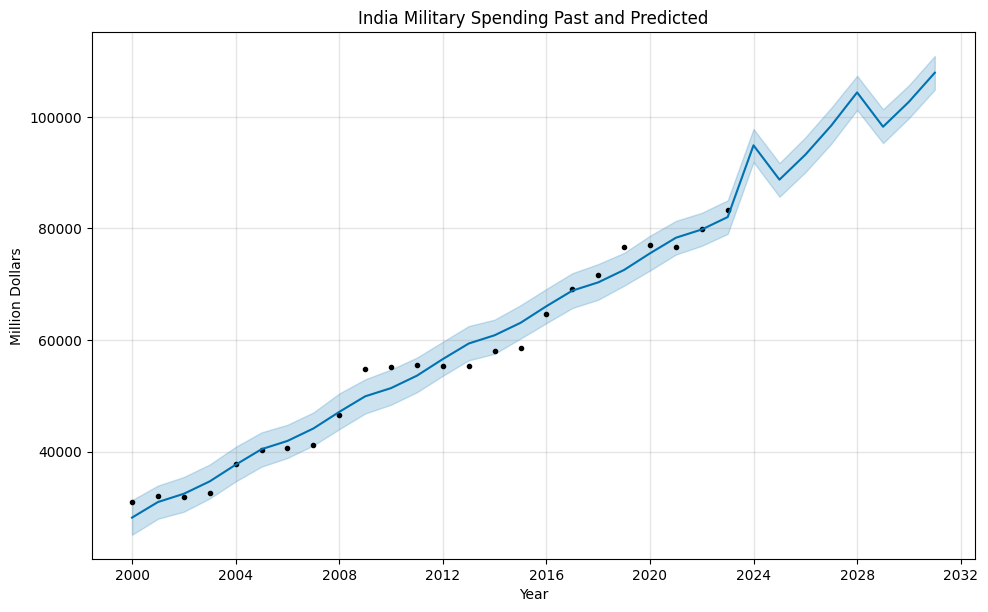

In [ ]:
fig1 = model.plot(forecast, xlabel= "Year", ylabel= "Million Dollars")
fig1.gca().set_title("India Military Spending Past and Predicted") # Set the title using the axes object

In [ ]:
#Evaluate the Prophet model using training and testing data sets

#split the data by a cut-off date of 2015 for training
cutoff_date = '2015-01-01'
train = India_df2[India_df2['ds'] < cutoff_date]
test = India_df2[India_df2['ds'] >= cutoff_date]


In [ ]:
#Fit the Prophet model on the training dataset
model_2 = Prophet(yearly_seasonality = True, weekly_seasonality=False, daily_seasonality=False) #add regressors if needed
model_2.fit(train[['ds', 'y']])


INFO:prophet:n_changepoints greater than number of observations. Using 11.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpswz4k28l/5nc_taa6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpswz4k28l/r2g_q712.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82992', 'data', 'file=/tmp/tmpswz4k28l/5nc_taa6.json', 'init=/tmp/tmpswz4k28l/r2g_q712.json', 'output', 'file=/tmp/tmpswz4k28l/prophet_modelzp49rgzz/prophet_model-20241206011118.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
01:11:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:11:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
#Forecast on the Test Period

#create a future dataframe and generate future dates that match the test period
# Make predictions on the test period; named forecast_2 to keep separate from
# Prophet simulation above
forecast_2 = model_2.predict(test[['ds']]) #This line is added to predict values and store them in forecast dataframe

In [ ]:
#Evaluate the Model

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from math import sqrt
import numpy as np

# Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(test['y'], forecast_2['yhat'])
print(f"Mean Absolute Error (MAE): {mae}")

#Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(test['y'], forecast_2['yhat']))
print(f"Root Mean Squared Error (MSE): {rmse}")

#Calculate the Mean Absolute Percentage Error (MAPE)
mape = mean_absolute_percentage_error(test['y'], forecast_2['yhat']) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")



Mean Absolute Error (MAE): 2489.53263429251
Root Mean Squared Error (MSE): 3029.237862024672
Mean Absolute Percentage Error (MAPE): 3.39%


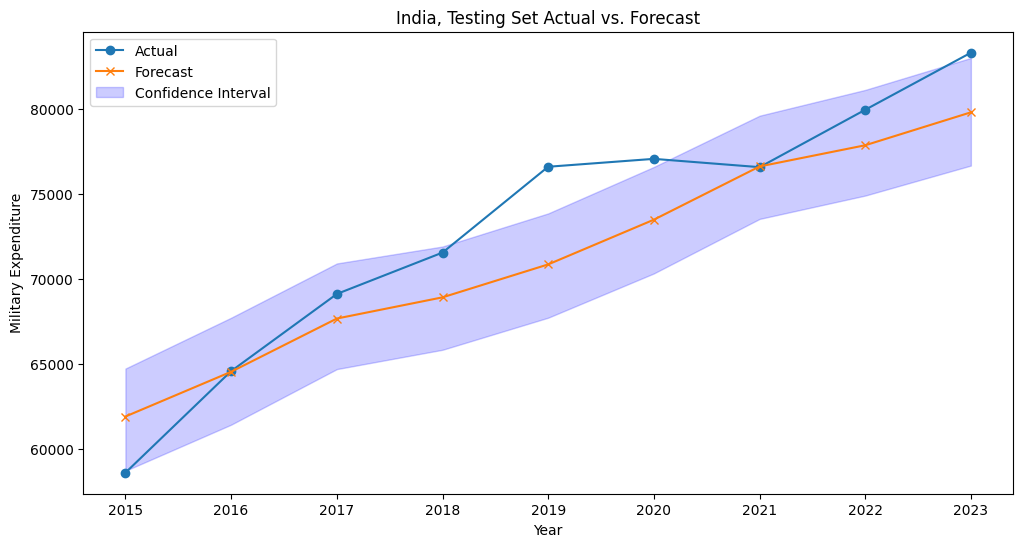

In [ ]:
#Visualize Results of Training and Testing

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(test['ds'], test['y'], label='Actual', marker = 'o')
plt.plot(forecast_2['ds'], forecast_2['yhat'], label='Forecast', marker = 'x')
plt.fill_between(
    forecast_2['ds'],
    forecast_2['yhat_lower'],
    forecast_2['yhat_upper'],
    color='blue', alpha=0.2, label='Confidence Interval'
)
plt.xlabel('Year')
plt.ylabel('Military Expenditure')
plt.title('India, Testing Set Actual vs. Forecast')
plt.legend()
plt.show()


In [ ]:
#evaluate the Prophet model using cross-validation function
from prophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial = '5110 days', period = '365 days', horizon = '365 days',)


INFO:prophet:Making 9 forecasts with cutoffs between 2014-01-03 00:00:00 and 2022-01-01 00:00:00


  0%|          | 0/9 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 11.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpswz4k28l/tnzl3vp0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpswz4k28l/bvvssho2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8852', 'data', 'file=/tmp/tmpswz4k28l/tnzl3vp0.json', 'init=/tmp/tmpswz4k28l/bvvssho2.json', 'output', 'file=/tmp/tmpswz4k28l/prophet_model3s_5w83l/prophet_model-20241206011148.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
01:11:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:11:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 11.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpswz4k28l/odmpdziy.json
DEBUG:cmdstanpy:input tempfil

In [ ]:
#show forcasts
#:There are 9 forecasts with cutoffs between 2014-01-03 and 2022-01-01
df_cv

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2015-01-01,61916.735165,58876.663526,65078.276546,58606.92885,2014-01-03
1,2016-01-01,63643.424797,60386.020717,66961.893145,64584.08171,2015-01-03
2,2017-01-01,67253.967324,64512.008161,70310.696572,69133.65013,2016-01-03
3,2018-01-01,68429.048741,65264.297992,71330.564439,71568.22018,2017-01-02
4,2019-01-01,70895.342230,68017.860233,73911.048885,76620.72741,2018-01-02
5,2020-01-01,74870.773730,71451.867441,78165.559675,77085.46974,2019-01-02
6,2021-01-01,78653.021652,75300.719330,82029.245030,76596.86420,2020-01-02
7,2022-01-01,79519.252361,76417.754448,82863.320292,79976.78933,2021-01-01
8,2023-01-01,81759.673429,78516.909476,84593.628728,83334.46007,2022-01-01


In [ ]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv, rolling_window = .5)
df_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,364 days,1.276813e+07,3573.251973,3239.733859,0.043626,0.036297,0.044796,0.500
1,365 days,4.921302e+06,2218.400672,1832.053730,0.023772,0.022871,0.024025,0.875


/usr/local/lib/python3.10/dist-packages/prophet/plot.py:546: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:547: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])


Figure(1000x600)


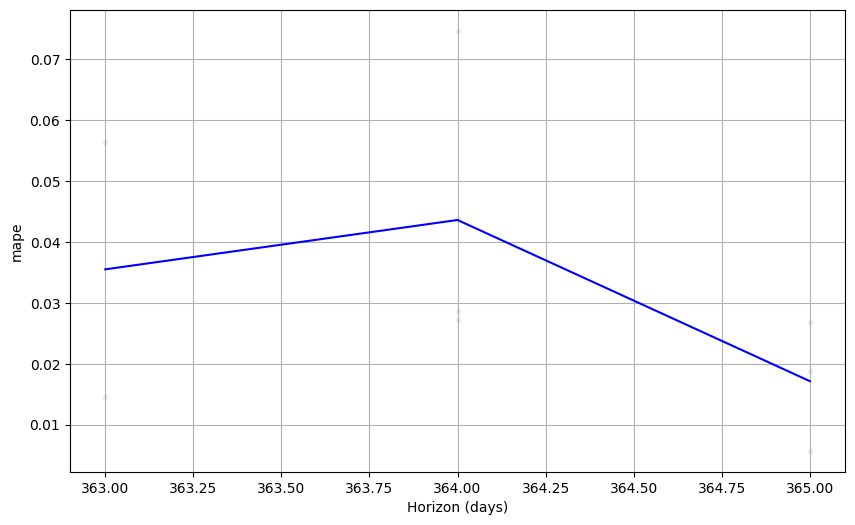

In [ ]:
#Visualize how the forcasting model performed
from prophet.plot import plot_cross_validation_metric
fig3 = plot_cross_validation_metric(df_cv, metric='mape')
print(fig3)

Cross validation performance metrics can be visualized with plot_cross_validation_metric, here shown for MAPE. Dots show the absolute percent error for each prediction in df_cv. The blue line shows the MAPE, where the mean is taken over a rolling window of the dots.